In [1]:
import pandas as pd
import numpy as np

In [96]:
data = pd.read_csv('C:\\Users\\Андрей Клычев\\Houses prices kaggle\\train.csv')

In [97]:
data_sub = pd.read_csv('C:\\Users\\Андрей Клычев\\Houses prices kaggle\\sample_submission.csv')

In [98]:
data.join(data_sub, how='inner', on='Id', rsuffix='SalePrice')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IdSalePrice,SalePriceSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1462,187758.393989
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1463,183583.683570
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1464,179317.477511
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1465,150730.079977
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,1466,177150.989247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2006,WD,Abnorml,84500,2915,167081.220949
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,0,10,2009,WD,Normal,185000,2916,164788.778231
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,2917,219222.423400
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,2918,184924.279659


In [99]:
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 14]

In [100]:
# удалим столбцы где совсем мало значений
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
data = data.dropna()

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(le.fit_transform)

In [102]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X=data.drop(['SalePrice', 'Id'], axis=1), y=data['SalePrice'])
model.score(data.drop(['SalePrice', 'Id'], axis=1), data['SalePrice'])

0.9847456477439012

Точность модели "случайный лес"

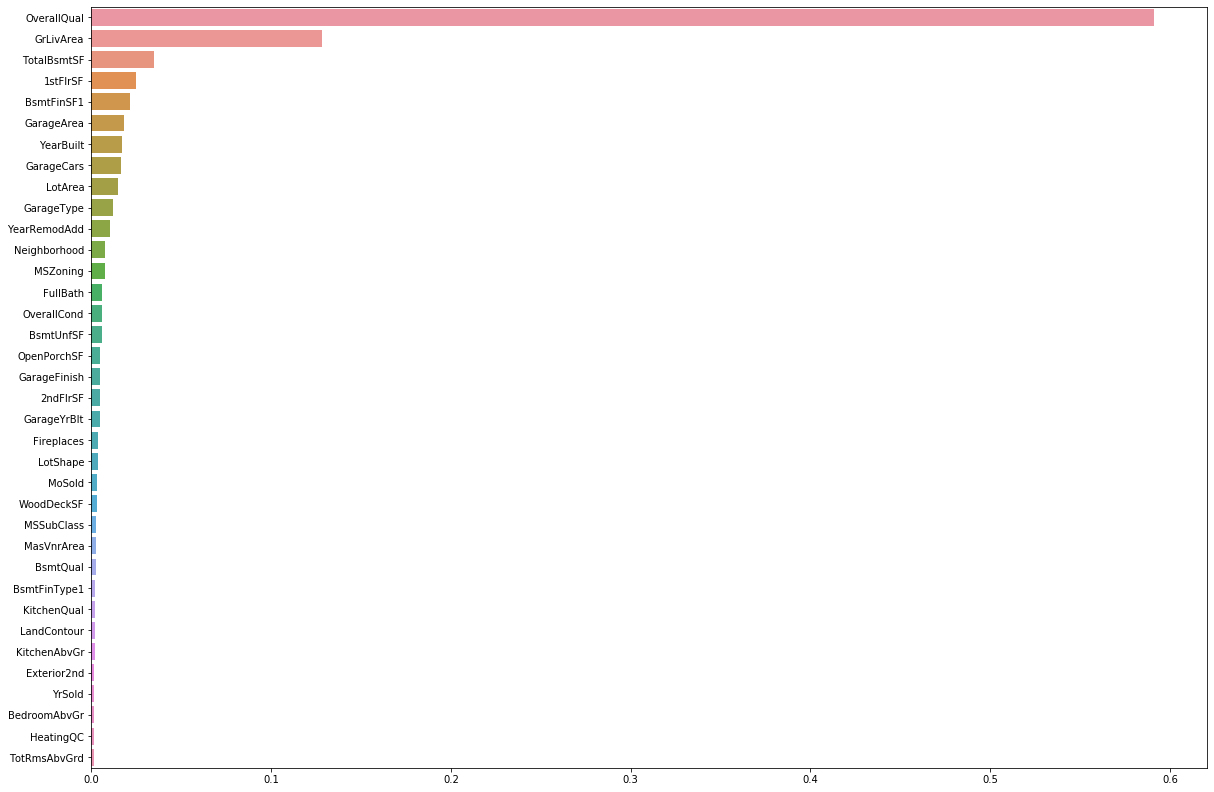

In [103]:
feature_imp = pd.Series(model.feature_importances_, index=data.drop(['SalePrice', 'Id'],axis=1).columns.values).sort_values(ascending=False)
sns.barplot(x=feature_imp[:int(len(feature_imp)/2)], y=feature_imp.index[:int(len(feature_imp)/2)])
plt.show()

In [123]:
data_test = pd.read_csv('C:\\Users\\Андрей Клычев\\Houses prices kaggle\\test.csv')
data_test = data_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'Id'], axis=1)
data_test = data_test.dropna()
data_test = data_test.apply(le.fit_transform)
data_test

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,713,1,3,3,0,4,0,12,...,0,0,0,17,0,0,5,4,8,4
1,0,3,888,1,0,3,0,0,0,12,...,24,0,0,0,0,21,5,4,8,4
2,5,3,872,1,0,3,0,4,0,8,...,22,0,0,0,0,0,2,4,8,4
3,5,3,536,1,0,3,0,4,0,8,...,24,0,0,0,0,0,5,4,8,4
4,11,3,106,1,0,1,0,4,0,22,...,68,0,0,26,0,0,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0,3,850,1,3,3,0,4,1,11,...,0,0,0,0,0,0,4,0,8,4
1452,13,4,3,1,3,3,0,4,0,10,...,0,0,0,0,0,0,11,0,8,0
1455,13,4,12,1,3,3,0,4,0,10,...,12,0,0,0,0,0,3,0,8,0
1456,0,3,987,1,3,3,0,4,0,11,...,0,0,0,0,0,0,8,0,8,0


In [105]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import LinearSVR
import warnings
warnings.filterwarnings('ignore')

In [125]:
estimators = [('en', ElasticNet()), ('svr', LinearSVR())]
clf = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=10)

In [126]:
clf.fit(X=data.drop(['SalePrice', 'Id'], axis=1), y=data['SalePrice'])

StackingRegressor(cv=10,
                  estimators=[('en', ElasticNet()), ('svr', LinearSVR())],
                  final_estimator=LinearRegression())

In [127]:
clf.score(data.drop(['SalePrice', 'Id'], axis=1), data['SalePrice'])

0.898136396166483

Точность при обучении ансамблем моделей оказалась ниже чем дают модели по отдельности 

In [110]:
# регрессия методом L1, L2 регуляризации
model_en = ElasticNet()
model_en.fit(data.drop(['SalePrice', 'Id'], axis=1), data['SalePrice'])
model_en.score(data.drop(['SalePrice', 'Id'], axis=1), data['SalePrice'])

0.8979242043692637

In [128]:
# Линейная регрессия
model_lr = LinearRegression()
model_lr.fit(data.drop(['SalePrice', 'Id'], axis=1), data['SalePrice'])
model_lr.score(data.drop(['SalePrice', 'Id'], axis=1), data['SalePrice'])

0.9129302313556085

In [113]:
# Проверим точность ансамблей заменив ElasticNet на модель случайного леса
estimators = [('rf', RandomForestRegressor()), ('svr', LinearSVR())]
clf = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=10)

In [114]:
clf.fit(X=data.drop(['SalePrice', 'Id'], axis=1), y=data['SalePrice'])
clf.score(data.drop(['SalePrice', 'Id'], axis=1), data['SalePrice'])

0.9697002204535666

In [124]:
# Сравнивать увы не с чем правильность тестовой выборки
y_pred = clf.predict(data_test)
y_pred

array([ 99.19105279, 195.67338877, 301.78055652, ...,  24.43216347,
       184.94644021, 402.77742754])